In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc

plt.rcParams["figure.figsize"] = [12, 12]
# If you have problems with latex at matplotlib just comment next two lines, this might help
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
 

def fix_scaling(ax=None):
    if not ax:
        xlim = plt.xlim()
        ylim = plt.ylim()
        d1 = xlim[1] - xlim[0]
        d2 = ylim[1] - ylim[0]
        if d1 > d2:
            plt.ylim((ylim[0] - (d1 - d2) / 2, ylim[1] + (d1 - d2) / 2))
        else:
            plt.xlim((xlim[0] + (d1 - d2) / 2, xlim[1] - (d1 - d2) / 2))
    else:
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        d1 = xlim[1] - xlim[0]
        d2 = ylim[1] - ylim[0]
        if d1 > d2:
            ax.set_ylim((ylim[0] - (d1 - d2) / 2, ylim[1] + (d1 - d2) / 2))
        else:
            ax.set_xlim((xlim[0] + (d1 - d2) / 2, xlim[1] - (d1 - d2) / 2))

In [7]:
# common function of projective gradiaent descent in R^n
def projective_grad(A, b, c, min_point):    
    def func(x):
        x = np.transpose(x)
        return (1 / 2 * np.transpose(x) @ A @ x - np.transpose(b) @ x + c)[0]
    
    
    def f_grad(x):
        x = np.transpose(x)
        return np.transpose((A @ x - b))[0]
    n = len(b)
    f_grad2 = A
    eigenvalues_f_grad2 = np.linalg.eigvals(f_grad2)
    lambdas = list(eigenvalues_f_grad2)
    f_min = func(min_point)
    iterations_number = 25
    
    def projection(x):
        return np.array(list(map(lambda x_i: max(min(x_i, 1), 0), x)))

    alpha = 2.0 / (sum(lambdas))
    trajectory_opt_step = []
    x_start = np.array([1 / 2 for i in range(n)])
    trajectory_opt_step.append(x_start.copy())
    cur_x = x_start.copy()
    for i in range(iterations_number):
        cur_x = cur_x - alpha * f_grad(cur_x)
        trajectory_opt_step.append(cur_x.copy())
        cur_x = projection(cur_x)
        trajectory_opt_step.append(cur_x.copy())
    return trajectory_opt_step

[array([0.5, 0.5]), array([0.5       , 0.83333333]), array([0.5       , 0.83333333]), array([0.72222222, 1.38888889]), array([0.72222222, 1.        ]), array([0.75925926, 1.37037037]), array([0.75925926, 1.        ]), array([0.74691358, 1.32098765]), array([0.74691358, 1.        ]), array([0.75102881, 1.33744856]), array([0.75102881, 1.        ]), array([0.74965706, 1.33196159]), array([0.74965706, 1.        ]), array([0.75011431, 1.33379058]), array([0.75011431, 1.        ]), array([0.7499619 , 1.33318092]), array([0.7499619, 1.       ]), array([0.7500127 , 1.33338414]), array([0.7500127, 1.       ]), array([0.74999577, 1.3333164 ]), array([0.74999577, 1.        ]), array([0.75000141, 1.33333898]), array([0.75000141, 1.        ]), array([0.74999953, 1.33333145]), array([0.74999953, 1.        ]), array([0.75000016, 1.33333396]), array([0.75000016, 1.        ]), array([0.74999995, 1.33333312]), array([0.74999995, 1.        ]), array([0.75000002, 1.3333334 ]), array([0.75000002, 1.      

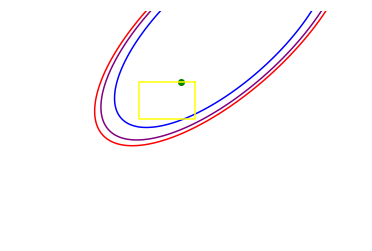

In [8]:
# n = 2 example
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

A = np.array([[4, -2], [-2, 2]])
b = np.array([[1], [2]])
c = 0
min_point = [3 / 4, 1]

def func(x):
    x = np.transpose(x)
    return (1 / 2 * np.transpose(x) @ A @ x - np.transpose(b) @ x + c)[0]

def animate_trajectory(trajectory):
    fig, ax = plt.subplots()
    n = len(trajectory)

    def step(t):
        ax.cla()
        ax.plot([min_point[0]], [min_point[1]], 'o', color='green')
        # Level contours
        delta = 0.025
        x = np.arange(-2, 4, delta)
        y = np.arange(-3, 3, delta)
        X, Y = np.meshgrid(x, y)
        Z = np.zeros_like(X)
        # print(X.shape, Y.shape)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Z[i][j] = func([X[i][j], Y[i][j]])
        CS = ax.contour(X, Y, Z, [0.5, 1.5, 2], colors=['blue', 'purple', 'red'])

        ax.plot([u[0] for u in trajectory[:t]], [u[1] for u in trajectory[:t]], color='black')
        ax.plot([u[0] for u in trajectory[:t]], [u[1] for u in trajectory[:t]], 'o', color='black')
        ax.plot([1, 1, 0, 0, 1], [1, 0, 0, 1, 1], color='yellow')

        fix_scaling(ax)
        ax.axis('off')

    return FuncAnimation(fig, step, frames=range(n), interval=600)

trajectory = projective_grad(A, b, c, min_point)
print(trajectory)
base_animation = animate_trajectory(trajectory)
HTML(base_animation.to_html5_video())

In [9]:
# n = 3 example
A = np.array([[4, -2, 1], [-2, 2, 1.5], [1, 1.5, 2]])
b = np.array([[1], [0], [0]])
c = 5
min_point = [1 / 4, 0, 0]
print(projective_grad(A, b, c, min_point))

[array([0.5, 0.5, 0.5]), array([0.375, 0.125, 0.125]), array([0.375, 0.125, 0.125]), array([ 0.28125, -0.21875, -0.21875]), array([0.28125, 0.     , 0.     ]), array([ 0.25   , -0.28125, -0.28125]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), array([0.25, 0.  , 0.  ]), array([ 0.25, -0.25, -0.25]), arr

In [18]:
plt.close()